<a href="https://colab.research.google.com/github/shahriyarredlearn/lab3_cse475/blob/main/CSE_475_ML_Lab_3_SEC_3_098.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
# Import necessary libraries

# Data manipulation and exploration
!pip install shap lime
!pip install kaggle


import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Machine Learning
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, VotingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Explainable AI
import shap
import lime
from lime.lime_tabular import LimeTabularExplainer


Defaulting to user installation because normal site-packages is not writeable
     ---------------------------------------- 0.0/275.7 kB ? eta -:--:--
     ---- ---------------------------------- 30.7/275.7 kB 1.4 MB/s eta 0:00:01
     ---------------- --------------------- 122.9/275.7 kB 1.8 MB/s eta 0:00:01
     ---------------------------- --------- 204.8/275.7 kB 1.8 MB/s eta 0:00:01
     -------------------------------------- 275.7/275.7 kB 1.9 MB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
   ---------------------------------------- 0.0/456.2 kB ? eta -:--:--
   ---------- ----------------------------- 122.9/456.2 kB ? eta -:--:--
   ---------------------- ----------------- 256.0/456.2 kB 5.2 MB/s eta 0:00:01
   ---------------------------------------- 456.2/456.2 kB 4.1 MB/s eta 0:00:00
  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283842 sha256=a734c68e11c6157a08d475c04979a25ab729ac9

In [27]:
!pip install xgboost

from sklearn.ensemble import RandomForestClassifier, VotingClassifier, StackingClassifier
from sklearn.model_selection import cross_val_score
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


Defaulting to user installation because normal site-packages is not writeable
   ---------------------------------------- 0.0/124.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/124.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/124.9 MB 393.8 kB/s eta 0:05:18
   ---------------------------------------- 0.1/124.9 MB 1.1 MB/s eta 0:01:58
   ---------------------------------------- 0.2/124.9 MB 1.3 MB/s eta 0:01:40
   ---------------------------------------- 0.4/124.9 MB 1.6 MB/s eta 0:01:19
   ---------------------------------------- 0.5/124.9 MB 1.8 MB/s eta 0:01:09
   ---------------------------------------- 0.7/124.9 MB 2.2 MB/s eta 0:00:56
   ---------------------------------------- 0.9/124.9 MB 2.5 MB/s eta 0:00:49
   ---------------------------------------- 1.2/124.9 MB 3.0 MB/s eta 0:00:42
   ---------------------------------------- 1.5/124.9 MB 3.2 MB/s eta 0:00:39
    --------------------------------------- 1.8/124.9 MB 3.6 MB/s eta 0:00:3

In [14]:
#to fine the path of your local jupyter notebook path
import os
print(os.getcwd())


C:\Users\shahr


In [15]:
import zipfile
import os

# Path to the ZIP file
zip_path = r'C:\Users\shahr\archive.zip'

# Folder to extract to
extract_folder = r'C:\Users\shahr\extracted_data'

# Create the directory if it doesn't exist
if not os.path.exists(extract_folder):
    os.makedirs(extract_folder)

# Extract the ZIP file
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_folder)

# List the files in the extracted folder to see what’s inside
extracted_files = os.listdir(extract_folder)
print(extracted_files)


['loan_data.csv']


In [16]:
import pandas as pd

# Path to the extracted CSV file
csv_file_path = r'C:\Users\shahr\extracted_data\loan_data.csv'

# Load the dataset into a pandas DataFrame
df = pd.read_csv(csv_file_path)

# Display the first few rows of the dataset
print(df.head())


   person_age person_gender person_education  person_income  person_emp_exp  \
0        22.0        female           Master        71948.0               0   
1        21.0        female      High School        12282.0               0   
2        25.0        female      High School        12438.0               3   
3        23.0        female         Bachelor        79753.0               0   
4        24.0          male           Master        66135.0               1   

  person_home_ownership  loan_amnt loan_intent  loan_int_rate  \
0                  RENT    35000.0    PERSONAL          16.02   
1                   OWN     1000.0   EDUCATION          11.14   
2              MORTGAGE     5500.0     MEDICAL          12.87   
3                  RENT    35000.0     MEDICAL          15.23   
4                  RENT    35000.0     MEDICAL          14.27   

   loan_percent_income  cb_person_cred_hist_length  credit_score  \
0                 0.49                         3.0           561  

In [17]:
# Check for missing values in the dataset
missing_values = df.isnull().sum()
print("Missing values per column:\n", missing_values)


Missing values per column:
 person_age                        0
person_gender                     0
person_education                  0
person_income                     0
person_emp_exp                    0
person_home_ownership             0
loan_amnt                         0
loan_intent                       0
loan_int_rate                     0
loan_percent_income               0
cb_person_cred_hist_length        0
credit_score                      0
previous_loan_defaults_on_file    0
loan_status                       0
dtype: int64


In [18]:
# One-hot encode categorical variables
df_encoded = pd.get_dummies(df, columns=['person_gender', 'person_education', 'person_home_ownership', 'loan_intent'], drop_first=True)

# Display the first few rows to check the encoding
print(df_encoded.head())


   person_age  person_income  person_emp_exp  loan_amnt  loan_int_rate  \
0        22.0        71948.0               0    35000.0          16.02   
1        21.0        12282.0               0     1000.0          11.14   
2        25.0        12438.0               3     5500.0          12.87   
3        23.0        79753.0               0    35000.0          15.23   
4        24.0        66135.0               1    35000.0          14.27   

   loan_percent_income  cb_person_cred_hist_length  credit_score  \
0                 0.49                         3.0           561   
1                 0.08                         2.0           504   
2                 0.44                         3.0           635   
3                 0.44                         2.0           675   
4                 0.53                         4.0           586   

  previous_loan_defaults_on_file  loan_status  ...  \
0                             No            1  ...   
1                            Yes      

In [19]:
# Check the target variable distribution
print(df_encoded['loan_status'].value_counts())


loan_status
0    35000
1    10000
Name: count, dtype: int64


In [30]:
from sklearn.preprocessing import LabelEncoder

# Initialize the LabelEncoder
le = LabelEncoder()

# List of categorical columns to encode
categorical_cols = ['person_gender', 'person_education', 'person_home_ownership',
                    'loan_intent', 'previous_loan_defaults_on_file']

# Apply label encoding to each categorical column
for col in categorical_cols:
    df[col] = le.fit_transform(df[col])

# Now, all categorical columns are encoded as numeric values


In [31]:
# Check the first few rows of the transformed dataset
df.head()


,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
0,22.0,0,4,71948.0,0,3,35000.0,4,16.02,0.49,3.0,561,0,1
1,21.0,0,3,12282.0,0,2,1000.0,1,11.14,0.08,2.0,504,1,0
2,25.0,0,3,12438.0,3,0,5500.0,3,12.87,0.44,3.0,635,0,1
3,23.0,0,1,79753.0,0,3,35000.0,3,15.23,0.44,2.0,675,0,1
4,24.0,1,4,66135.0,1,3,35000.0,3,14.27,0.53,4.0,586,0,1


In [34]:
# Features (X) and target (y)
X = df_encoded.drop(columns=['loan_status'])
y = df_encoded['loan_status']


In [35]:
# Train-test split
from sklearn.model_selection import train_test_split

X = df.drop('loan_status', axis=1)  # Features
y = df['loan_status']  # Target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Evaluate the Random Forest model on the test data
y_pred_rf = rf_model.predict(X_test)
print(f"Random Forest Accuracy: {accuracy_score(y_test, y_pred_rf)}")
print(classification_report(y_test, y_pred_rf))


Random Forest Accuracy: 0.9286666666666666
              precision    recall  f1-score   support

           0       0.94      0.97      0.95      6990
           1       0.89      0.78      0.83      2010

    accuracy                           0.93      9000
   macro avg       0.91      0.87      0.89      9000
weighted avg       0.93      0.93      0.93      9000



In [33]:
# Check the first few rows of the features and target
print(X_train.head())
print(y_train.head())


       person_age  person_gender  person_education  person_income  \
25180        34.0              0                 1        97265.0   
12555        25.0              1                 3        72953.0   
29153        41.0              0                 4       322597.0   
23838        27.0              1                 0        94232.0   
35686        27.0              1                 4        84873.0   

       person_emp_exp  person_home_ownership  loan_amnt  loan_intent  \
25180              11                      0    15000.0            4   
12555               3                      3    12000.0            5   
29153              18                      0    24000.0            4   
23838               4                      3     9600.0            1   
35686               7                      3     7059.0            2   

       loan_int_rate  loan_percent_income  cb_person_cred_hist_length  \
25180          12.73                 0.15                         9.0   
12555 

In [36]:
from sklearn.model_selection import GridSearchCV

# Set up the hyperparameter grid for Random Forest
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=RandomForestClassifier(random_state=42),
                           param_grid=param_grid,
                           cv=5,  # 5-fold cross-validation
                           n_jobs=-1,  # Use all available cores
                           verbose=2)

# Fit the grid search to the training data
grid_search.fit(X_train, y_train)

# Display the best parameters found by GridSearchCV
print(f"Best Parameters: {grid_search.best_params_}")


Fitting 5 folds for each of 216 candidates, totalling 1080 fits
Best Parameters: {'bootstrap': False, 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 300}


In [37]:
# Get the best Random Forest model from GridSearchCV
best_rf_model = grid_search.best_estimator_

# Predict with the best model
y_pred_best_rf = best_rf_model.predict(X_test)

# Evaluate the performance
from sklearn.metrics import accuracy_score, classification_report
print(f"Best Random Forest Accuracy: {accuracy_score(y_test, y_pred_best_rf)}")
print(classification_report(y_test, y_pred_best_rf))


Best Random Forest Accuracy: 0.9278888888888889
              precision    recall  f1-score   support

           0       0.94      0.97      0.95      6990
           1       0.88      0.78      0.83      2010

    accuracy                           0.93      9000
   macro avg       0.91      0.88      0.89      9000
weighted avg       0.93      0.93      0.93      9000



In [38]:
# Import XGBoost
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report

# Initialize the XGBoost model
xgb_model = XGBClassifier(random_state=42)

# Train the model
xgb_model.fit(X_train, y_train)

# Predict on the test data
y_pred_xgb = xgb_model.predict(X_test)

# Evaluate the performance
print(f"XGBoost Accuracy: {accuracy_score(y_test, y_pred_xgb)}")
print(classification_report(y_test, y_pred_xgb))


XGBoost Accuracy: 0.9321111111111111
              precision    recall  f1-score   support

           0       0.94      0.97      0.96      6990
           1       0.88      0.80      0.84      2010

    accuracy                           0.93      9000
   macro avg       0.91      0.89      0.90      9000
weighted avg       0.93      0.93      0.93      9000



In [39]:
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

# Initialize base models
base_learners = [
    ('rf', RandomForestClassifier(n_estimators=300, random_state=42)),
    ('xgb', XGBClassifier(random_state=42))
]

# Initialize the meta-model
meta_model = LogisticRegression()

# Create the stacking model
stacking_model = StackingClassifier(estimators=base_learners, final_estimator=meta_model)

# Train the stacking model
stacking_model.fit(X_train, y_train)

# Predict on the test data
y_pred_stacking = stacking_model.predict(X_test)

# Evaluate the performance
print(f"Stacking Model Accuracy: {accuracy_score(y_test, y_pred_stacking)}")
print(classification_report(y_test, y_pred_stacking))


Stacking Model Accuracy: 0.9313333333333333
              precision    recall  f1-score   support

           0       0.94      0.97      0.96      6990
           1       0.88      0.80      0.84      2010

    accuracy                           0.93      9000
   macro avg       0.91      0.88      0.90      9000
weighted avg       0.93      0.93      0.93      9000



In [40]:
from sklearn.ensemble import VotingClassifier

# Initialize individual models
rf_model = RandomForestClassifier(n_estimators=300, random_state=42)
xgb_model = XGBClassifier(random_state=42)
log_reg_model = LogisticRegression()

# Create a hard voting classifier
voting_model = VotingClassifier(estimators=[
    ('rf', rf_model),
    ('xgb', xgb_model),
    ('log_reg', log_reg_model)
], voting='hard')

# Train the voting model
voting_model.fit(X_train, y_train)

# Predict on the test data
y_pred_voting = voting_model.predict(X_test)

# Evaluate the performance
print(f"Voting Classifier Accuracy: {accuracy_score(y_test, y_pred_voting)}")
print(classification_report(y_test, y_pred_voting))


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Voting Classifier Accuracy: 0.9276666666666666
              precision    recall  f1-score   support

           0       0.93      0.98      0.95      6990
           1       0.90      0.76      0.82      2010

    accuracy                           0.93      9000
   macro avg       0.92      0.87      0.89      9000
weighted avg       0.93      0.93      0.93      9000



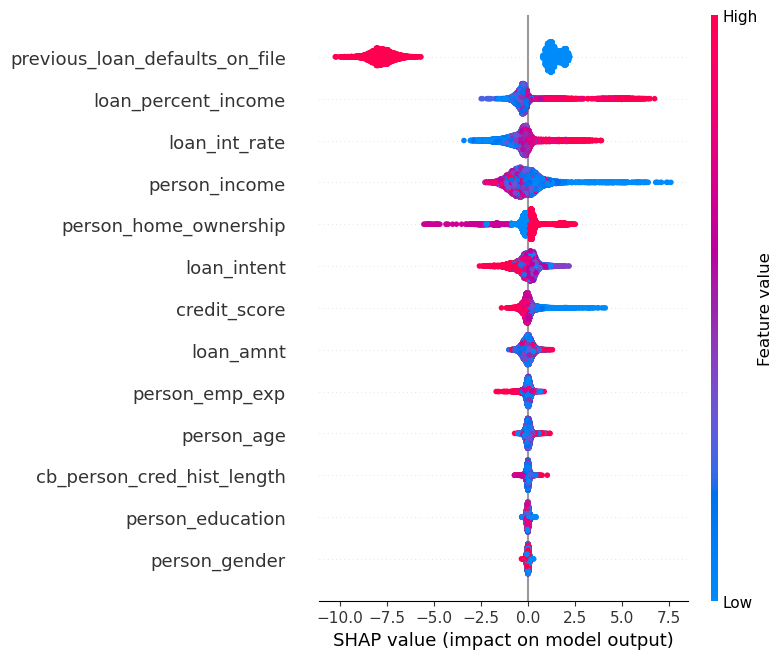

In [43]:
# Import necessary libraries
import shap
from xgboost import XGBClassifier

# Train the XGBClassifier model
xgb_model = XGBClassifier(random_state=42)
xgb_model.fit(X_train, y_train)

# Now, initialize SHAP explainer after fitting the model
explainer = shap.TreeExplainer(xgb_model)

# Calculate SHAP values for the test set
shap_values = explainer.shap_values(X_test)

# Visualize SHAP values (Summary plot)
shap.summary_plot(shap_values, X_test)


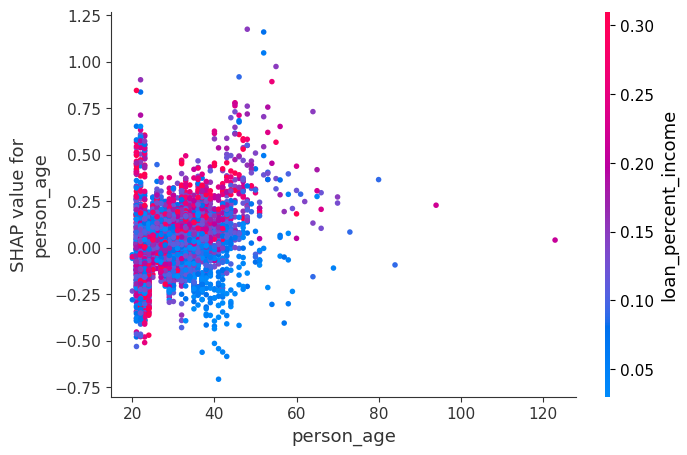

In [45]:
# Generate SHAP dependence plot for a specific feature
shap.dependence_plot("person_age", shap_values, X_test)


In [46]:
print(X_test.columns)


Index(['person_age', 'person_gender', 'person_education', 'person_income',
       'person_emp_exp', 'person_home_ownership', 'loan_amnt', 'loan_intent',
       'loan_int_rate', 'loan_percent_income', 'cb_person_cred_hist_length',
       'credit_score', 'previous_loan_defaults_on_file'],
      dtype='object')


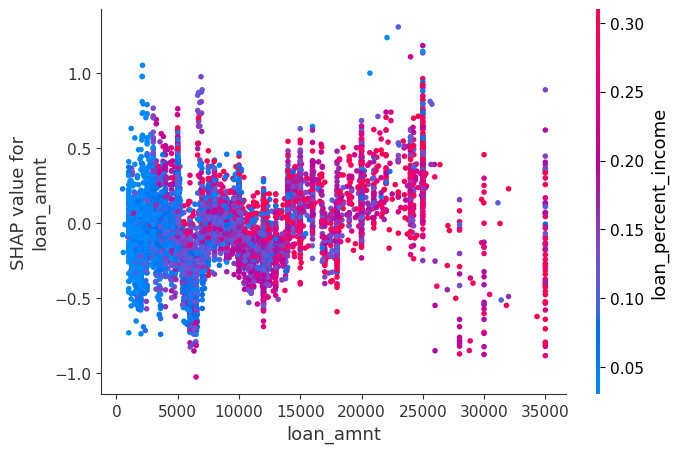

In [47]:
shap.dependence_plot("loan_amnt", shap_values, X_test)


In [50]:
!pip install lime
from lime.lime_tabular import LimeTabularExplainer
import numpy as np


Defaulting to user installation because normal site-packages is not writeable


In [51]:
explainer = LimeTabularExplainer(
    training_data = X_train.values,  # the feature data (as pandas dataframe or numpy array)
    mode = "classification",  # or "regression" based on the type of model
    class_names = [0, 1],  # list of class names (for binary classification)
    feature_names = X_train.columns,  # column names of the features
    discretize_continuous=True  # whether to discretize continuous features
)


In [52]:
# Select the instance from the test set
instance = X_test.iloc[0].values

# Generate explanation
explanation = explainer.explain_instance(instance, xgb_model.predict_proba, num_features=5)

# Show the explanation
explanation.show_in_notebook()


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


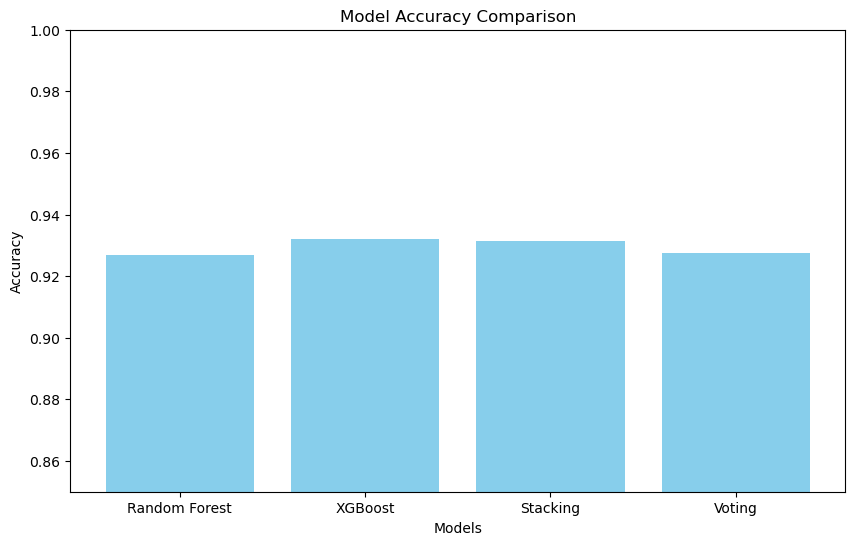

In [55]:
from sklearn.metrics import accuracy_score

# Train the Random Forest model (if not already done)
rf_model.fit(X_train, y_train)

# Train the XGBoost model (if not already done)
xgb_model.fit(X_train, y_train)

# Train the Stacking model (if not already done)
stacking_model.fit(X_train, y_train)

# Train the Voting model (if not already done)
voting_model.fit(X_train, y_train)

# Now evaluate each model on the test set
rf_accuracy = accuracy_score(y_test, rf_model.predict(X_test))
xgb_accuracy = accuracy_score(y_test, xgb_model.predict(X_test))
stacking_accuracy = accuracy_score(y_test, stacking_model.predict(X_test))
voting_accuracy = accuracy_score(y_test, voting_model.predict(X_test))

# Create a list of model names and corresponding accuracies
models = ['Random Forest', 'XGBoost', 'Stacking', 'Voting']
accuracies = [rf_accuracy, xgb_accuracy, stacking_accuracy, voting_accuracy]

# Plot the accuracies
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.bar(models, accuracies, color='skyblue')
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Model Accuracy Comparison')
plt.ylim(0.85, 1)
plt.show()


In [ ]:
import shap

# Initialize SHAP explainer for the Random Forest model
rf_explainer = shap.TreeExplainer(rf_model)
shap_values_rf = rf_explainer.shap_values(X_test)

# SHAP summary plot for Random Forest
shap.summary_plot(shap_values_rf, X_test)


In [ ]:
from sklearn.model_selection import GridSearchCV

# Define parameter grid for Random Forest
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10]
}

# Create a GridSearchCV instance for Random Forest
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=5, scoring='accuracy')

# Fit the grid search
grid_search.fit(X_train, y_train)

# Get the best parameters and model
best_rf_model = grid_search.best_estimator_
best_rf_params = grid_search.best_params_
print("Best Random Forest Parameters:", best_rf_params)


In [ ]:
import joblib

# Save the best Random Forest model
joblib.dump(best_rf_model, 'best_rf_model.pkl')

# Load the model later for inference
loaded_rf_model = joblib.load('best_rf_model.pkl')
